<center>
<p>Assignment-1<br/>
ID: 20-42382-1</p>
</center>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import math


In [2]:
cat = []
train_path = "D:/Github/CIFAR-10-images/train/"

for i in os.listdir(train_path):
    cat.append(i)
print(cat)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
train = []
for x in cat:
    path = os.path.join(train_path,x)
    c_label = cat.index(x)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        train.append([c_label, image])
print(len(train))

100%|██████████| 5000/5000 [00:01<00:00, 3578.48it/s]

50000


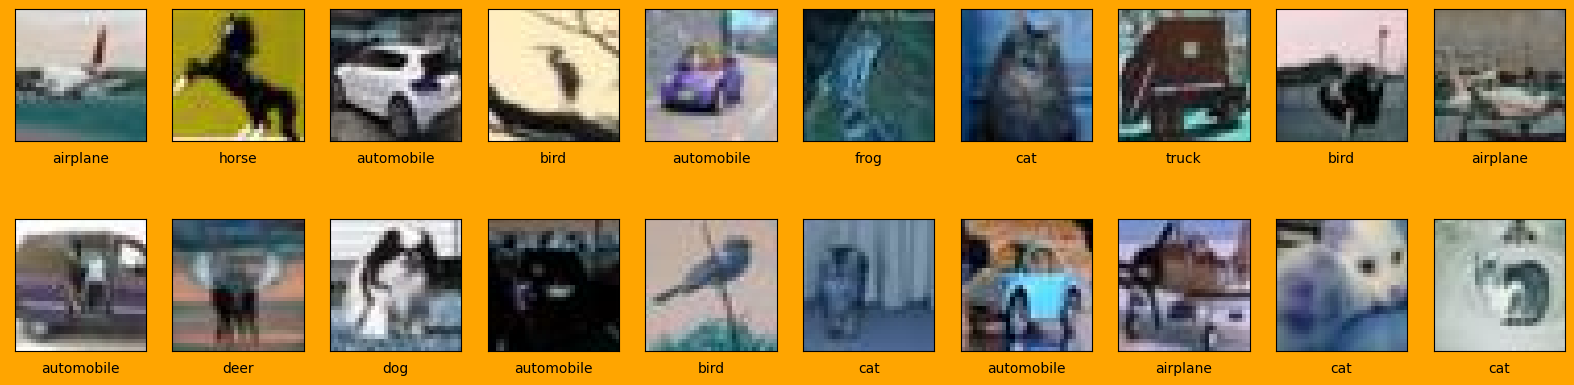

In [4]:
random.shuffle(train)
plt.figure(figsize=(20,5), facecolor='orange')

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(train[i][1])
    plt.xlabel(cat[train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
f1 = train[0:2000]
f2 = train[2000:4000]
f3 = train[4000:6000]
f4 = train[6000:8000]
f5 = train[8000:10000]

print(len(train), len(f1), len(f2), len(f3), len(f4), len(f5))

50000 2000 2000 2000 2000 2000


<h5>Defining necessary functions</h5>

In [6]:
#some_functions_for_KNN
def K_NN(tr, val, k, d_metric):
    predset = []
    for p in val:
        dists = []
        for q in tr:
            distance = 0
            if d_metric == 'L1':
                distance = np.sum(np.abs(p[1]-q[1]))
            elif d_metric == 'L2':
                distance = math.sqrt(np.sum((p[1]-q[1])**2))
            dists.append([distance, q[0]])
        dists.sort(key=lambda x:x[0])
        neighbors = dists[:k]
        pred = predict(neighbors)
        predset.append(pred)
    return predset


def predict(neighbors):
    c_votes = {}
    for n in neighbors:
        response = n[1]
        if response in c_votes:
            c_votes[response] += 1
        else:
            c_votes[response] = 1
    sorted_votes = sorted(c_votes.items(), key=lambda x:x[1], reverse=True)
    return sorted_votes[0][0]


def accuracy(tr, val, k_values, d_metrics):
    acc_dict = {}
    for dm in d_metrics:
        accs = []
        for k in k_values:
            pred = K_NN(tr, val, k, dm)
            correct = 0
            for i in range(len(val)):
                if val[i][0] == pred[i]:
                    correct += 1
            accs.append((correct*100)/float(len(val)))
        acc_dict[dm] = accs
    return acc_dict


<h5>Calculating Accuracies for different K values using distance metrics</h5>

In [7]:
k_values = np.arange(1, 21, 2)
d_metrics = ['L1', 'L2']
tr = []
val = []

accs_per_fold = []
for i in tqdm(range(5)):
    if i==0:
        tr = f2+f3+f4+f5
        val = f1
    elif i==1:
        tr = f1+f3+f4+f5
        val = f2
    elif i==2:
        tr = f1+f2+f4+f5
        val = f3
    elif i==3:
        tr = f1+f2+f3+f5
        val = f4
    elif i==4:
        tr = f1+f2+f3+f4
        val = f5

    acc_dict = accuracy(tr, val, k_values, d_metrics)
    accs_per_fold.append(acc_dict)

print(len(accs_per_fold))


100%|██████████| 5/5 [14:29:16<00:00, 10431.20s/it]  

5


#Plotting the Graph for KNN accuracy


Average L1-accuracy: [22.42, 23.51, 24.2, 24.59, 24.56, 24.49, 24.5, 24.56, 24.59, 24.6]
Average L2-accuracy: [20.8, 21.64, 21.94, 21.39, 21.73, 21.79, 22.09, 21.7, 21.53, 22.06]


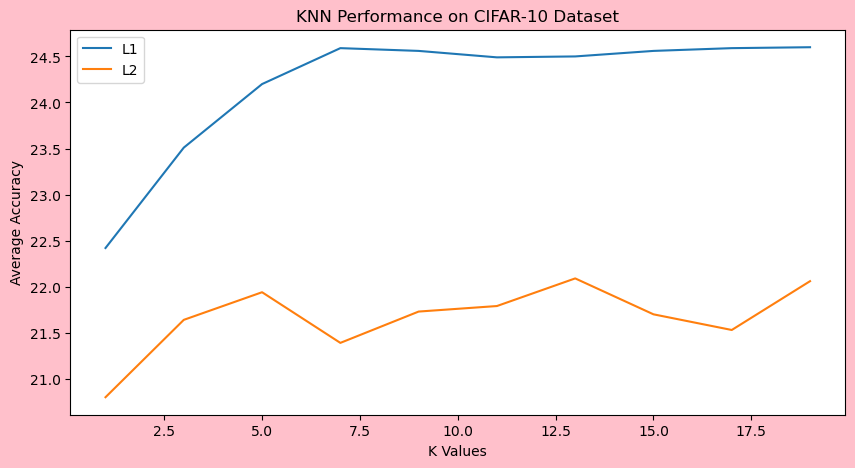

In [54]:

accs_per_fold = np.array(accs_per_fold)
# for i in range(5):
#     for k in k_values:
#         print("Fold:{}  K:{}  ".format(i+1, k), end="")
#         for dm in d_metrics:
#             print("{}:{:.2f}%  ".format(dm, accs_per_fold[i][dm][k_values.tolist().index(k)]), end="")
#         print()
print()

plt.figure(figsize=(10,5), facecolor='pink')
for dm in d_metrics:
    avg_accs = []
    for k in range(len(k_values)):
        av_acc = np.sum([accs_per_fold[i][dm][k] for i in range(5)])/5
        avg_accs.append(round(av_acc, 2))
    print(f"Average {dm}-accuracy: {avg_accs}")
    plt.plot(k_values, avg_accs, label=dm)

plt.xlabel("K Values")
plt.ylabel("Average Accuracy")
plt.title("KNN Performance on CIFAR-10 Dataset")
plt.legend()
plt.show()
